Download the train.csv file and save it to the same location as your iPython Notebooks. 

In [1]:
#Now let's open it with pandas
import pandas as pd
from pandas import Series,DataFrame

# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('titanic.csv')

# Let's see a preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# We could also get overall info for the dataset
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?

In [3]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic_df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**1. Who are the passengers**
- How many male and females

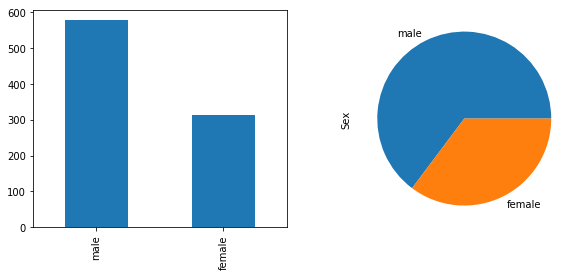

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
titanic_df['Sex'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
titanic_df['Sex'].value_counts().plot(kind='pie')
plt.show()

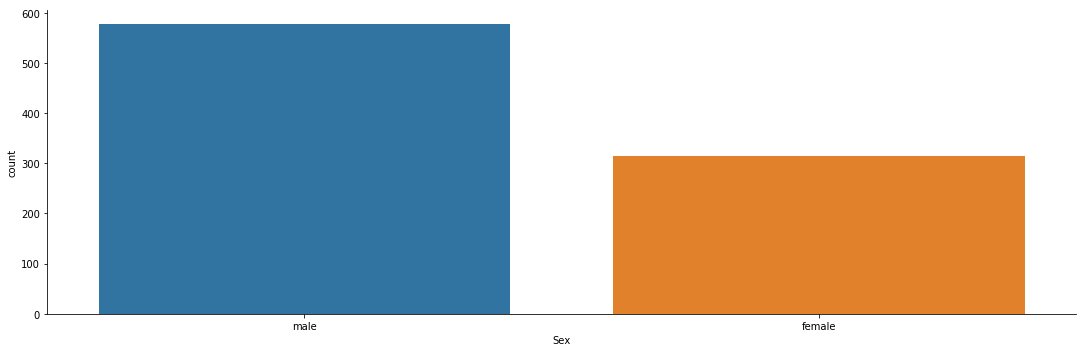

In [6]:
# Let's first check gender
sns.catplot(x= 'Sex',data=titanic_df,kind='count',aspect=3)

In [7]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

> **Male** passenger are more than **female** passengers

3    491
1    216
2    184
Name: Pclass, dtype: int64

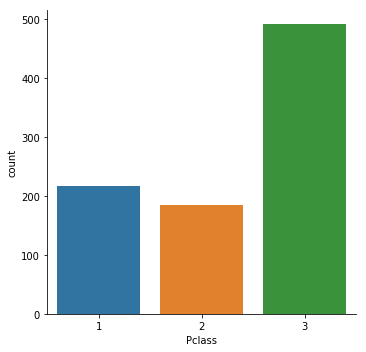

In [8]:
# Now let's seperate the genders by classes, remember we can use the 'hue' arguement here!
sns.catplot('Pclass',data=titanic_df,kind='count')
titanic_df['Pclass'].value_counts()

> It is found that more passenger are travelling in **3rd** class and least in **2nd** class

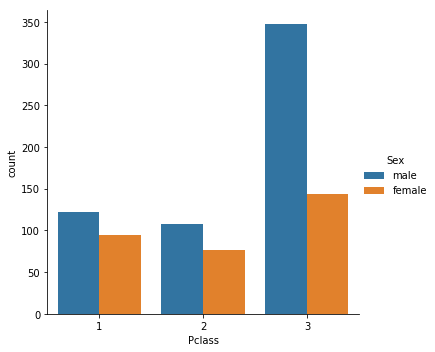

In [9]:
sns.catplot(x='Pclass',hue='Sex',data=titanic_df,kind='count')

In [10]:
by = titanic_df[['Pclass','Sex','PassengerId']].groupby(
    by=['Pclass','Sex'])

In [11]:
by.count()

PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347

In [12]:
# crosstab is used for count
ps = pd.crosstab(titanic_df['Pclass'],titanic_df['Sex'])
ps

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


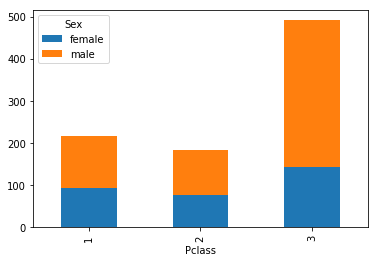

In [13]:
ps.plot(kind='bar',stacked=True)

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. How can we go about this?

In [14]:

def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 10:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [15]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,male


In [16]:
import time

In [17]:
%%timeit
person =[]
for i in range(len(titanic_df)):

    row = titanic_df.loc[i]
    age,sex = row.Age, row.Sex
    if age <= 10:
        person.append('child')
    else:
        person.append(sex)
        
# print("Time taken =",time.time()-t)

395 ms ± 9.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
def findchild(rows):
    age,sex = rows
    if age <= 10:
        return 'child'
    else:
        return sex

In [19]:
%%timeit
titanic_df['person']=titanic_df[['Age','Sex']].apply(findchild,axis=1)

31 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female


# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

Excellent! Now we have seperated the passengers between female,male,and child. This will be important later on beacuse of the famous "Women and children first policy"!

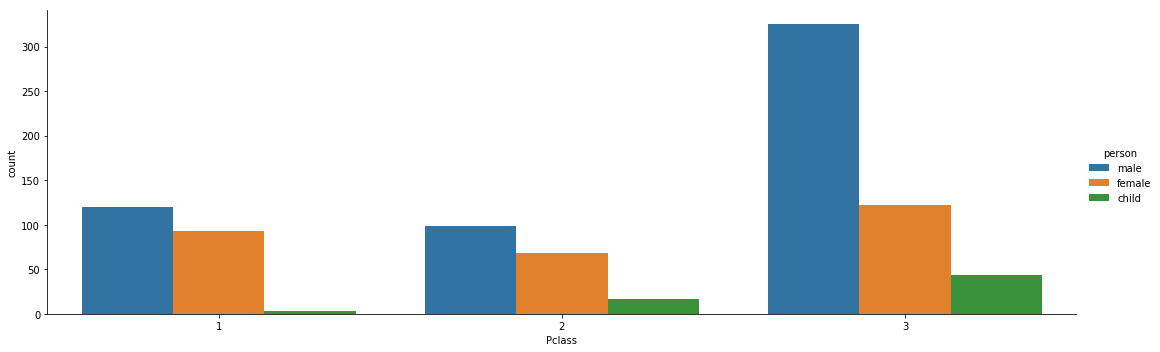

In [21]:
# Let's try the factorplot again!
sns.catplot('Pclass',data=titanic_df,hue='person',
            kind='count',aspect=3)

In [22]:
pd.crosstab(index=titanic_df['Pclass'],columns=titanic_df['person'])

person,child,female,male
Pclass,,,
1,3,93,120
2,17,68,99
3,44,122,325


Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

In [23]:
titanic_df['Age'].min(),titanic_df['Age'].max()

(0.42, 80.0)

In [24]:
age = titanic_df['Age'].dropna()

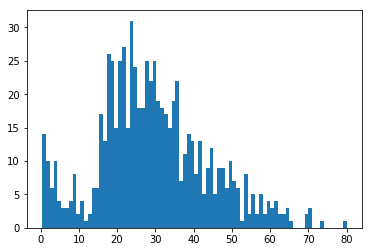

In [25]:
# Age distribution
plt.hist(age,bins=80)
plt.show()

- *1. Box plot*
- *2. Box for age "male" and "Female"*
- *3. Box plot for age in different class*
- *4. Box plot for age in different class and sex*

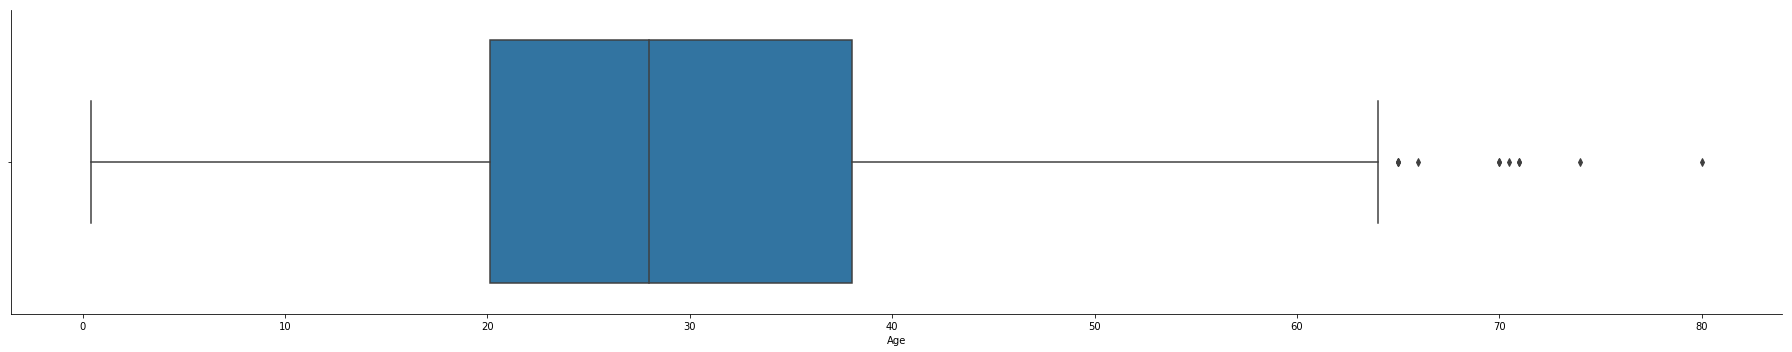

In [26]:
sns.catplot(x='Age',data=titanic_df,kind='box',aspect=5)

In [27]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

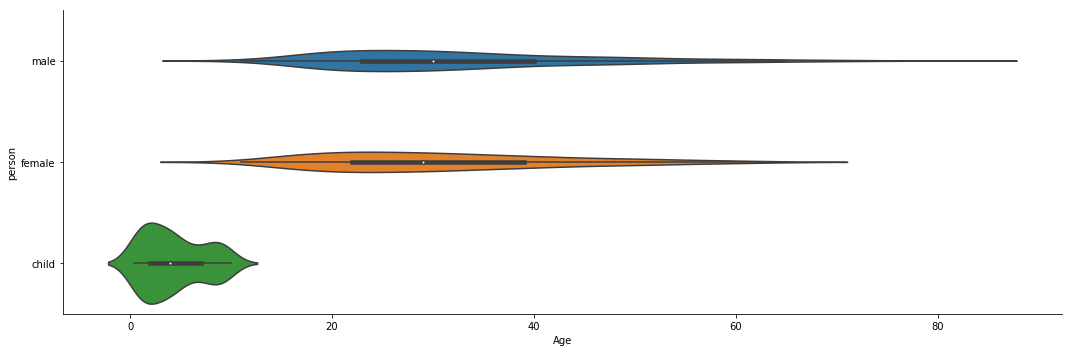

In [28]:
sns.catplot(x='Age',y='person',data=titanic_df,kind='violin',aspect=3)

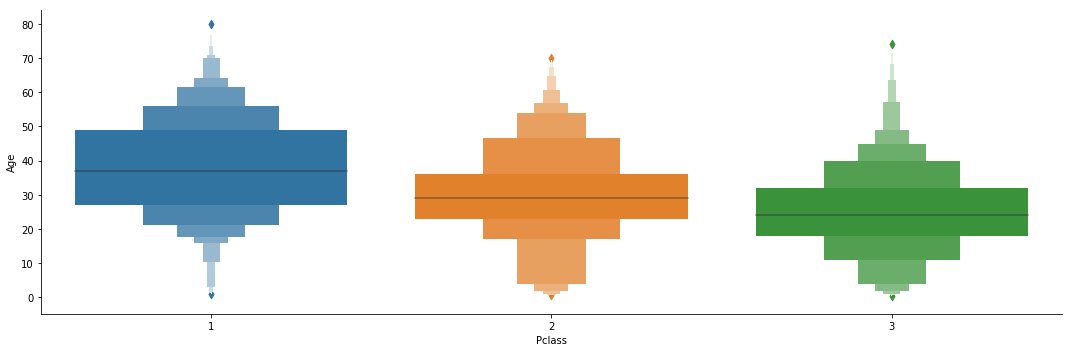

In [29]:
sns.catplot(y='Age',x='Pclass',data=titanic_df,kind='boxen',aspect=3)

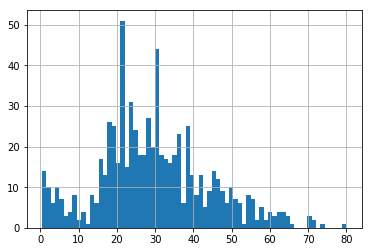

In [30]:
# Quick way to create a histaaaogram using pandas
titanic_df['Age'].hist(bins=70)

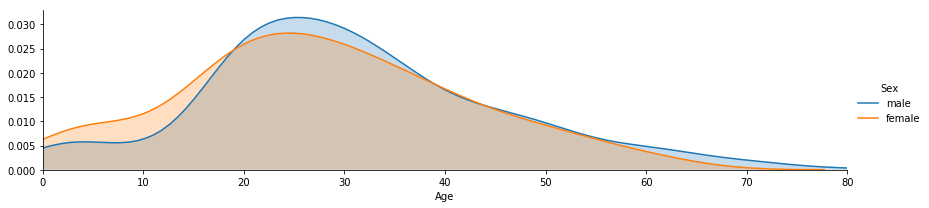

In [31]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

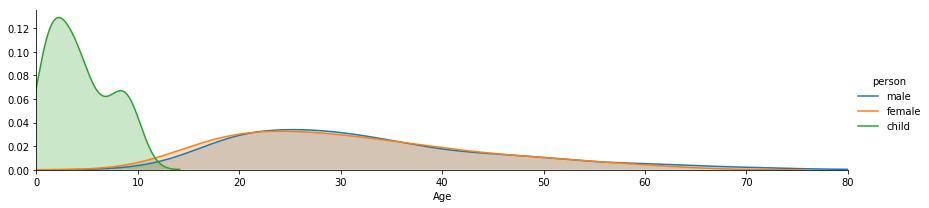

In [32]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

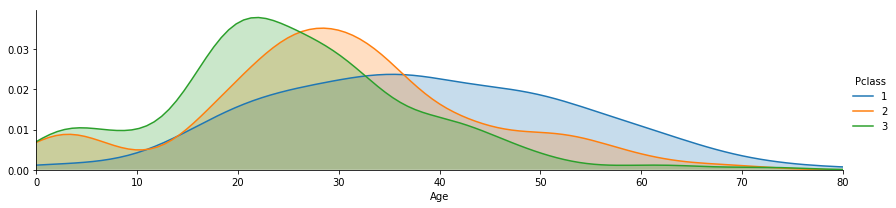

In [33]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


- most of the passengers are male
- most of passengers in titanic are in 3rd class
- most males, females and childerns (<10 year) are in 3rd class
- It is intersting found that 20-30 year of age group found more that other age group
- Age group
    - 1st class is around 30 - 50 years
    - 2nd class is around 25 - 35 years
    - 3rd class is 15 - 25 years
    

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [34]:
# Let's get a quick look at our dataset again
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [35]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [36]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

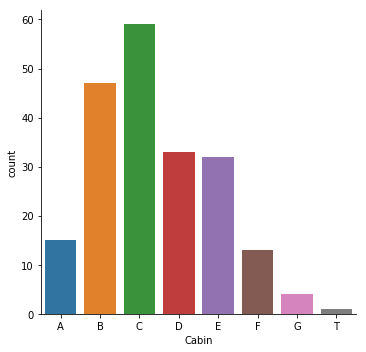

In [37]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
levels.sort()
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,kind='count')

Interesting to note we have a 'T' deck value there which doesn't make sense, we  can drop it out with the following code:

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

    3.) Where did the passengers come from?

In [38]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

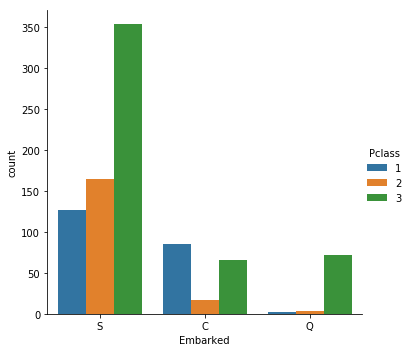

In [39]:
# Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count')

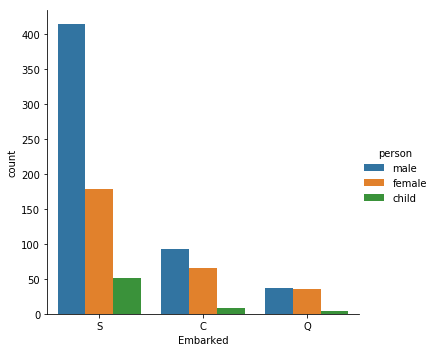

In [40]:
sns.catplot('Embarked',data=titanic_df,hue='person',kind='count')

In [41]:
by = titanic_df.groupby(by=['Embarked','Pclass','person'])

In [42]:
by.count()

PassengerId  Survived  Name  Sex  Age  SibSp  Parch  \
Embarked Pclass person                                                        
C        1      female           43        43    43   43   38     43     43   
                male             42        42    42   42   36     42     42   
         2      child             2         2     2    2    2      2      2   
                female            6         6     6    6    6      6      6   
                male              9         9     9    9    7      9      9   
         3      child             7         7     7    7    7      7      7   
                female           17        17    17   17   10     17     17   
                male             42        42    42   42   24     42     42   
Q        1      female            1         1     1    1    1      1      1   
                male              1         1     1    1    1      1      1   
         2      female            2         2     2    2    1      2      2   
                male              1         1     1    1    1      1      1   
         3      child             4         4     4    4    4      4      4   
                female           33        33    33   33   10     33     33   
                male             35        35    35   35   10     35     35   
S        1      child             3         3     3    3    3      3      3   
                female           47        47    47   47   43     47     47   
                male             77        77    77   77   62     77     77   
         2      child            15        15    15   15   15     15     15   
                female           60        60    60   60   59     60     60   
                male             89        89    89   89   82     89     89   
         3      child            33        33    33   33   33     33     33   
                female           72        72    72   72   60     72     72   
                male            248       248   248  248  197    248    248   

                        Ticket  Fare  Cabin  
Embarked Pclass person                       
C        1      female      43    43     35  
                male        42    42     31  
         2      child        2     2      0  
                female       6     6      1  
                male         9     9      1  
         3      child        7     7      0  
                female      17    17      1  
                male        42    42      0  
Q        1      female       1     1      1  
                male         1     1      1  
         2      female       2     2      1  
                male         1     1      0  
         3      child        4     4      0  
                female      33    33      0  
                male        35    35      1  
S        1      child        3     3      3  
                female      47    47     42  
                male        77    77     61  
         2      child       15    15      4  
                female      60    60      7  
                male        89    89      2  
         3      child       33    33      3  
                female      72    72      3  
                male       248   248      4

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

    4.) Who was alone and who was with family?

In [43]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.



In [44]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

C:\Users\Mahitha\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Alone          537
With Family    354
Name: Alone, dtype: int64

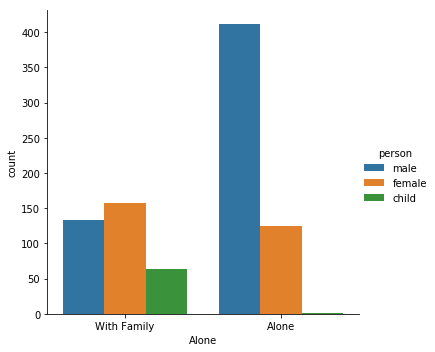

In [46]:
# Now let's get a simple visualization!
sns.catplot('Alone',data=titanic_df,kind='count',hue='person')
titanic_df.Alone.value_counts()

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: *What factors helped someone survive the sinking?*

no     549
yes    342
Name: Survivor, dtype: int64

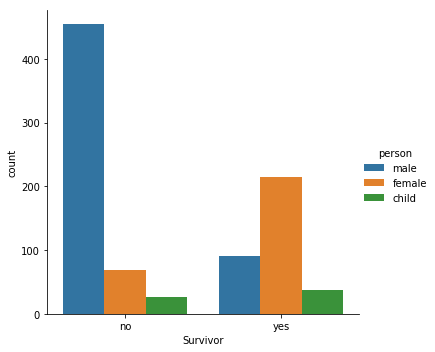

In [47]:
# Let's start by creating a new column for legibility purposes through mapping (Lec 36)
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.catplot('Survivor',data=titanic_df,kind='count',hue='person')
titanic_df.Survivor.value_counts()

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

C:\Users\Mahitha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


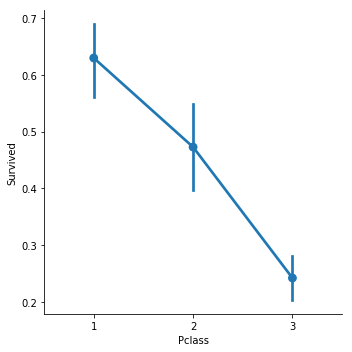

In [48]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

C:\Users\Mahitha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


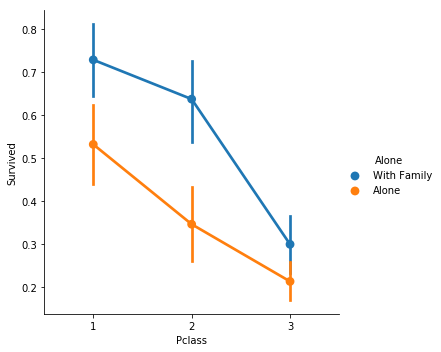

In [49]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='Alone',data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

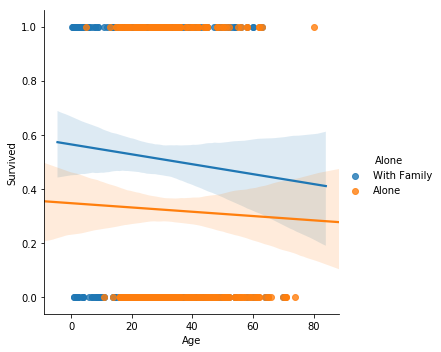

In [50]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df,hue='Alone')

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

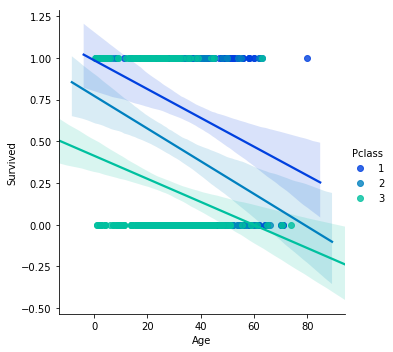

In [51]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

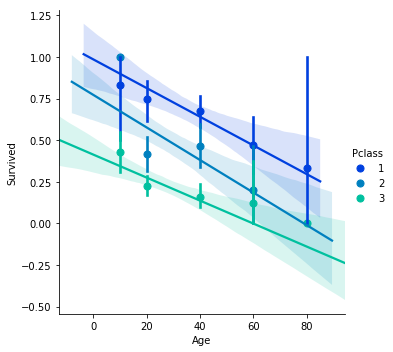

In [52]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

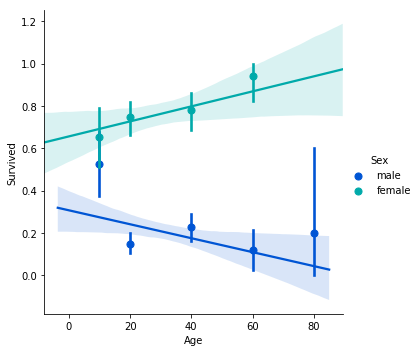

In [53]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival. Now you take control: Answer the following questions using pandas and seaborn:

    1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
    2.) Did having a family member increase the odds of surviving the crash?
    
Feel free to post a discussion if you get stuck or have more ideas!

- Fantastic work on your first go at a Data Analysis Project! Go ahead and keep playing with the data or try following along with Kaggle's sci-kit learn tutorial for this data (we'll look at it through a machine learning perspective later in the course)

In [54]:
l = [98.6,102.1,100.7,102,97,103.4,98.9,101.6,102.9,105.2]

In [55]:
np.array(l).std()/np.sqrt(10)

0.7433976055920548

In [57]:
####example for above equation
101.24+1.96*0.7433

102.696868